## Portfolio Optimization: Boosting Returns and Lowering Risk

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
portfolio = {
    'AAPL': 10,
    'TSLA': 5,
    'MSFT': 15,
    'GOOGL': 7
}

start_date = '2023-01-01'
end_date = '2024-01-01'

In [3]:
data = yf.download(list(portfolio.keys()), start=start_date, end=end_date)['Adj Close']
data

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,GOOGL,MSFT,TSLA
Date,,,,
2023-01-03 00:00:00+00:00,123.904625,88.899872,236.183517,108.099998
2023-01-04 00:00:00+00:00,125.182617,87.862442,225.852097,113.639999
2023-01-05 00:00:00+00:00,123.855095,85.987076,219.158340,110.339996
2023-01-06 00:00:00+00:00,128.412231,87.124260,221.741211,113.059998
2023-01-09 00:00:00+00:00,128.937271,87.802582,223.900162,119.769997
...,...,...,...,...
2023-12-22 00:00:00+00:00,192.868149,141.140518,372.543945,252.539993
2023-12-26 00:00:00+00:00,192.320206,141.170441,372.623505,256.609985
2023-12-27 00:00:00+00:00,192.419830,140.023270,372.036713,261.440002


In [4]:
current_returns = data.pct_change().dropna()

total_value = sum(portfolio[stock] * data[stock].iloc[-1] for stock in portfolio)

weights = np.array([portfolio[stock] * data[stock].iloc[-1] / total_value for stock in portfolio])

portfolio_return = np.dot(weights, current_returns.mean()) * 252

cov_matrix = current_returns.cov() * 252

portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [5]:
portfolio_return, portfolio_volatility

(0.5391094838785194, 0.21985950132056997)

In [6]:
benchmark = yf.download('SPY', start=start_date, end=end_date)['Adj Close']

benchmark_returns = benchmark.pct_change().dropna()
benchmark_return = benchmark_returns.mean()*252
benchmark_volatility = benchmark_returns.std() * np.sqrt(252)

benchmark_return, benchmark_volatility

[*********************100%***********************]  1 of 1 completed


(0.24821919834343145, 0.130914746409189)

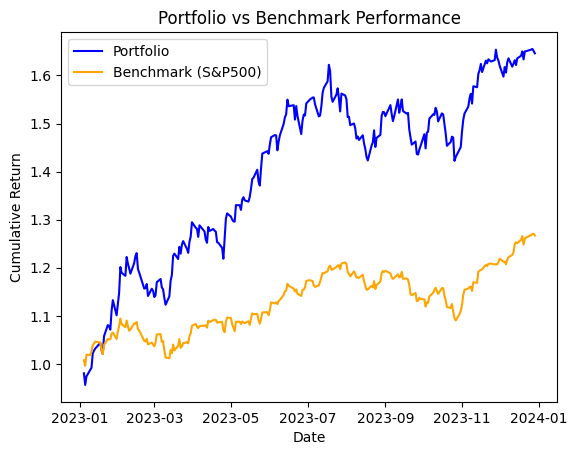

In [7]:
portfolio_cumulative = (current_returns + 1).cumprod().dot(weights)

benchmark_cumulative = (benchmark_returns + 1).cumprod()

plt.plot(portfolio_cumulative.index, portfolio_cumulative, label='Portfolio', color='blue')
plt.plot(benchmark_cumulative.index, benchmark_cumulative, label='Benchmark (S&P500)', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio vs Benchmark Performance')
plt.legend()
plt.show()

In [9]:
potential_assets = ['NFLX', 'AMZN', 'NVDA']
potential_data = yf.download(potential_assets, start=start_date, end=end_date)['Adj Close']
potential_returns = potential_data.pct_change().dropna()

sharpe_ratios = {}

for asset in potential_assets:
    combined_returns = pd.concat([current_returns, potential_returns[asset]], axis=1).dropna()
    new_weights = np.append(weights * (1 - 0.1), 0.1)
    new_expected_return = np.dot(new_weights, combined_returns.mean()) * 252
    combined_cov_matrix = combined_returns.cov() * 252
    new_portfolio_volatility = np.sqrt(np.dot(new_weights.T, np.dot(combined_cov_matrix, new_weights)))
    sharpe_ratio = (new_expected_return - 0.03) / new_portfolio_volatility
    sharpe_ratios[asset] = sharpe_ratio

best_asset = max(sharpe_ratios, key=sharpe_ratios.get)
best_asset, sharpe_ratios[best_asset]

[*********************100%***********************]  3 of 3 completed


('NVDA', 2.5716505317672427)

In [10]:
sharpe_ratios

{'NFLX': 2.3583655714683727,
 'AMZN': 2.3475847595979693,
 'NVDA': 2.5716505317672427}